**You can use Google but don't use ChatGPT and Gemini. You are here to learn. Follow the instructions given below and write the code in that cell only.**


**Dataset Link:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [9]:
# Load the dataset using pandas

import pandas as pd
data = pd.read_csv("WineQT.csv")
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


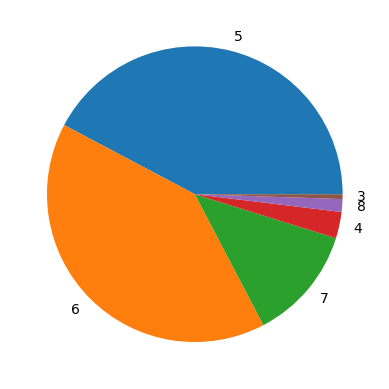

5


In [10]:
# Plot the pie chart showing how much each quality exist in this dataset
# Your pie chart should have 6 parts with each part representing 1 quality number
# Print out the quality which has the highest percent
import matplotlib.pyplot as plt
quality_count = data["quality"].value_counts()
#quality_count
plt.pie(quality_count, labels = quality_count.index)
plt.show()
print(quality_count.idxmax())


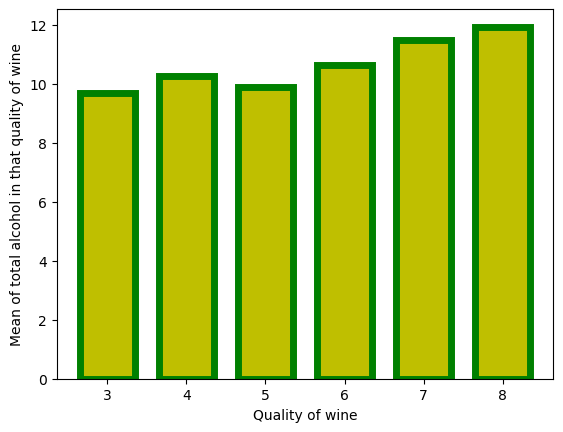

In [18]:
# Plot a bar graph
# X axis: Quality of wine
# Y axis: Mean of total alcohol in that quality of wine
# Suppose quality 5 has 9.4, 9.8, 9.2 as entries in alcohol column then the value will be (9.4 + 9.8 + 9.2)/3
# Hint: use groupby() and mean() methods
data1 = data.groupby("quality").mean()
x = data1.index
y = data1.alcohol
plt.bar(x, y, color = "y", width = 0.7, edgecolor = "green", lw = 5)
plt.xlabel("Quality of wine")
plt.ylabel("Mean of total alcohol in that quality of wine")
plt.show()

In [19]:
# Partition df into X and Y
# Y has only one column which is quality (target)
# X has all the other columns (features)
Y = data.quality
X = data.drop("quality", axis = 1)

In [25]:
# Split into train and test datasets using test_size = 0.2 and random_state = 97
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 97)
#X_train["volatile acidity"]

In [ ]:
# Define a function which implements the Min-Max Scaler
# Your function should take a column of X_train as input and returns a list/np array/pd series which is scaled version of that column
def Scaler(X_train):
    #a = input()
    #x_train = X_train[a]
    x_normalize = (x_train - x_train.min())/(x_train.max() - x_train.min())
    return pd.Series(x_normalize)
#a = input()
#x_train = X_train[a]
#abc = Scaler(x_train)
#print(abc)


In [42]:
# Print out the min, max, mean value of the scaled column = 'volatile acidity'
# Print out the min, max, mean value of the scaled column = 'free sulfur dioxide'
# Which has higher min, max and mean value?
a = input("Enter column name: ")
b = input("Enter other column name: ")
x_train = X_train[a]
a_volatile = Scaler(x_train)
print("min, max and mean value of scaled 'volatile acidity':", a_volatile.min(), ",", a_volatile.max(), "and", a_volatile.mean(), "respectively")

x_train = X_train[b]
b_sulfur = Scaler(x_train)
print("min, max and mean value of scaled 'free sulfur dioxide':", b_sulfur.min(), ",", b_sulfur.max(), "and", b_sulfur.mean(), "respectively")
#print(a_volatile)
#b_sulfur

Enter column name: volatile acidity
Enter other column name: free sulfur dioxide
min, max and mean value of scaled 'volatile acidity': 0.0 , 1.0 and 0.2819722130631576 respectively
min, max and mean value of scaled 'free sulfur dioxide': 0.0 , 1.0 and 0.21704660504915252 respectively


In [44]:
# Perform normalization using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
### Transformation
X_train_scaled = scaler.transform(X_train)


scaler = StandardScaler().fit(X_test)
### Transformation
X_test_scaled = scaler.transform(X_test)

"""
scaler = StandardScaler().fit(Y_train)
### Transformation
Y_train_scaled = scaler.transform(Y_train)


scaler = StandardScaler().fit(Y_test)
### Transformation
Y_test_scaled = scaler.transform(Y_test)
"""

'\nscaler = StandardScaler().fit(Y_train)\n### Transformation\nY_train_scaled = scaler.transform(Y_train)\n\n\nscaler = StandardScaler().fit(Y_test)\n### Transformation\nY_test_scaled = scaler.transform(Y_test)\n'

**Dataset Link:** https://drive.google.com/file/d/1M_djcbJS8LRZl2Vp5ulESjhzZHMJrNRE/view?usp=sharing

Use this dataset for the below questions, the first column is the target column whereas all the other columns are features.

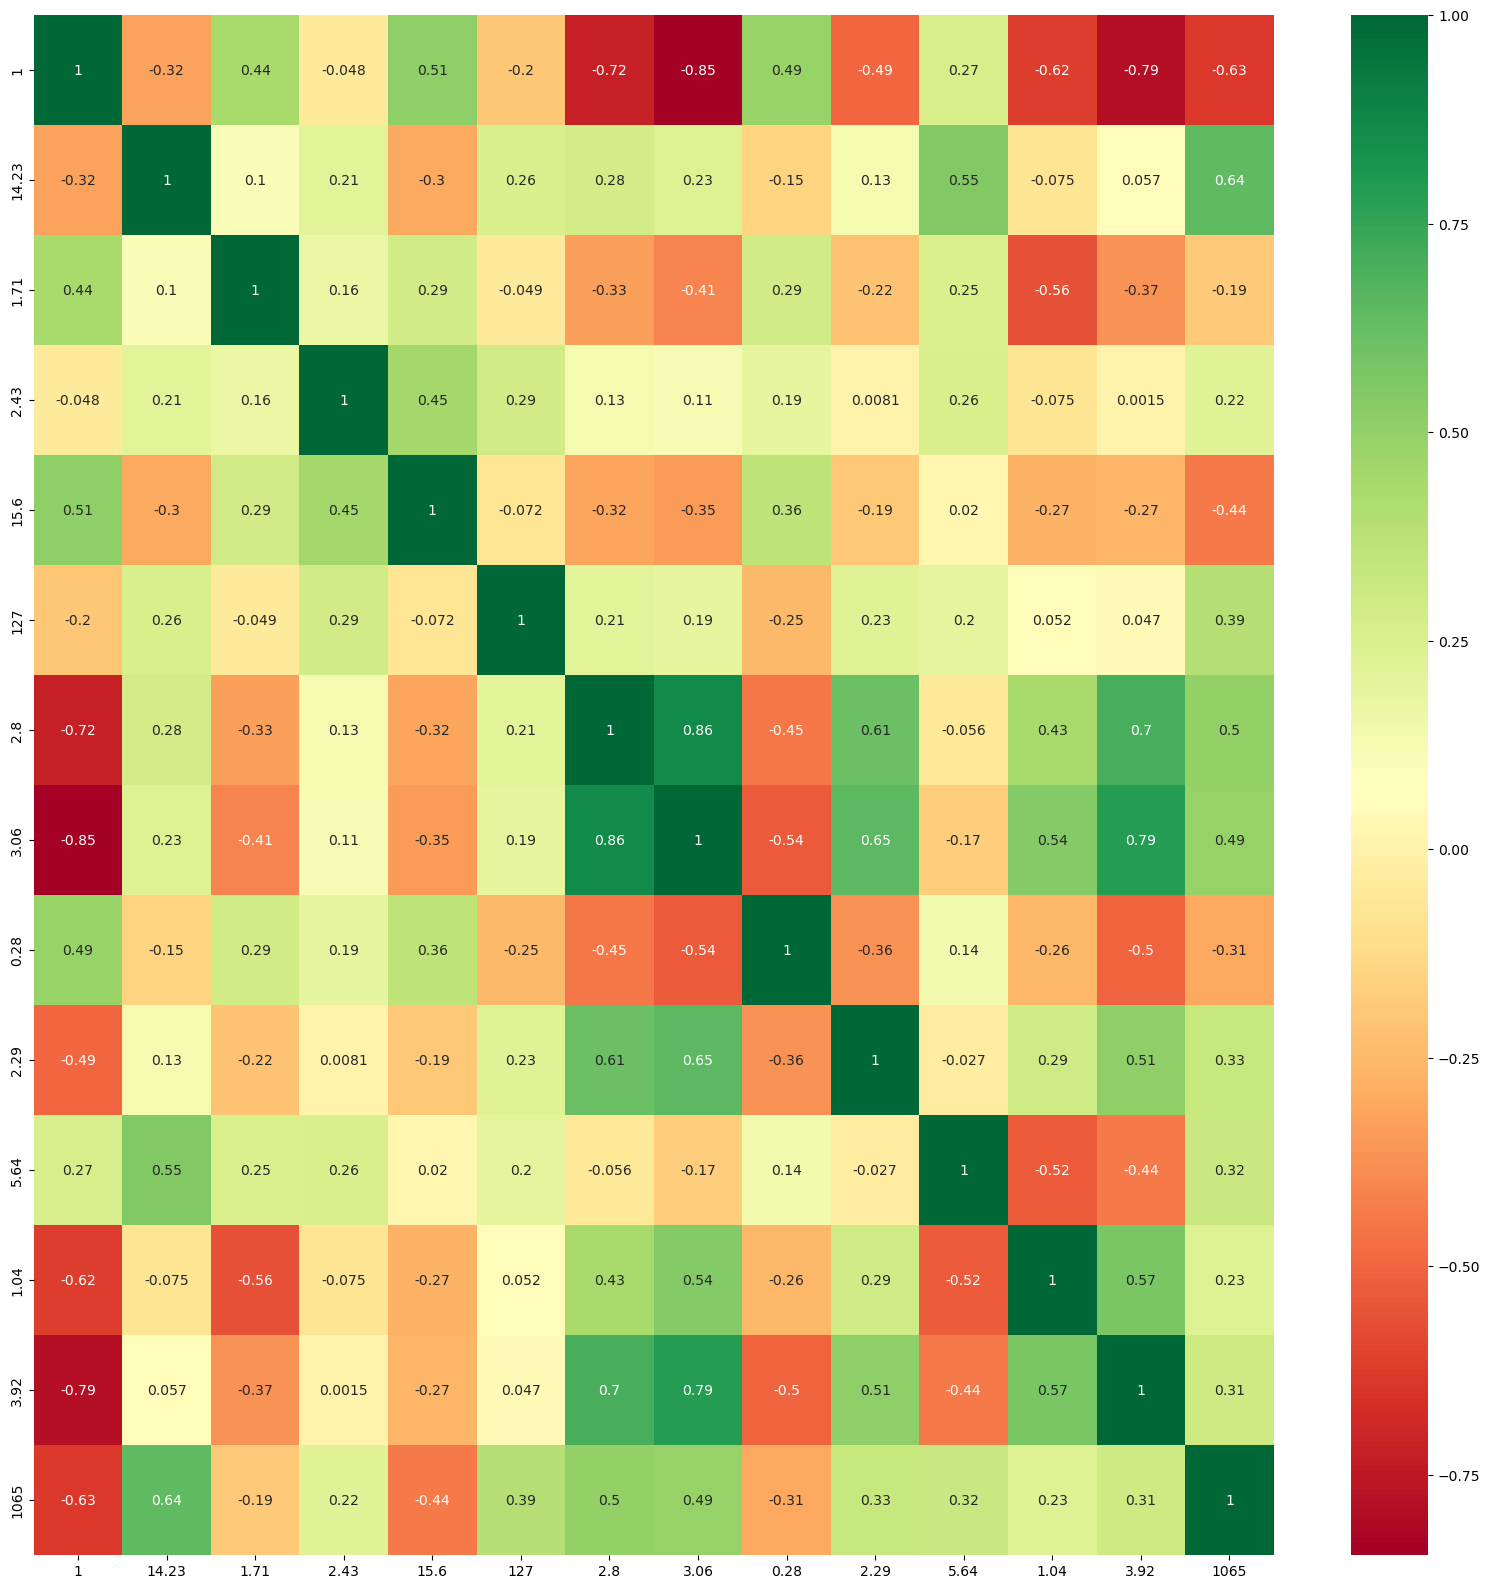

In [53]:
# Print out the correlation matrix of df
data_set = pd.read_csv("CLS_DATASET.csv")
#X2 = data_set.iloc[:, 1:len(data_set.columns)]
#y2 = data_set.iloc[:, 0]
import seaborn as sns
#get correlations of each features in datset
corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
#plot heat map 
g = sns.heatmap(data_set[top_corr_features].corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [32]:
# Nothing to code in this cell, just read and understand

# Thumb Rule: If the magnitude of correlation between two features is high (close to 1) then both features are highly related to each other
# This means that one feature can be expressed in the form of other.
# In simple words feature_2 = some_function(feature_1)
# So it is advisable to drop one of the features and consider only one of them for training the machine learning model


# Thumb Rule: If the magnitude of correlation between one feature and target is high (close to 1) then that features is highly related to the target
# We should consider this feature for training the model


# Thumb Rule: If two features are highly correlated with each other and each feature has a high correlation with the target as well
# Then we consider only 1 feature even though both have higher correlation with the target
# We generally consider the feature which has a higher correlation with the target

2.8, 3.06


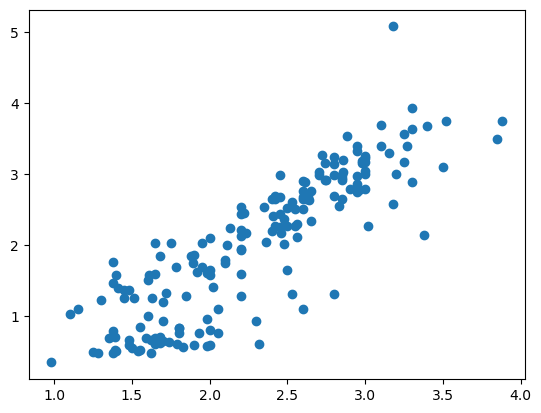

Obsevations: Most of the points are near to the line y = x
We can conclude that there is linear relation between them.


In [55]:
# Can you name two columns which show the relation mentioned in rule 1
# The column names are just numbers
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.
print("2.8, 3.06")
x_dataset = data_set["2.8"]
y_dataset = data_set["3.06"]
plt.scatter(x_dataset, y_dataset)
plt.show()
print("Obsevations: Most of the points are near to the line y = x")
print("We can conclude that there is linear relation between them.")

3.06, 1


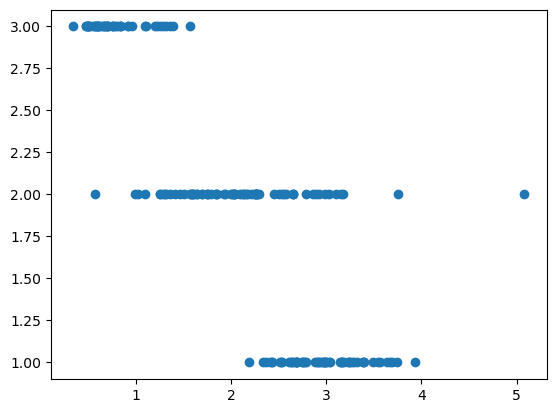

Obsevations: Most of the points lie on y = (3 - floor(x-0.5))
We can conclude that there is a relation betwen them as above function.


In [57]:
# Can you name two columns which show the relation mentioned in rule 2
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.
print("3.06, 1")
x_data_set = data_set["3.06"]
y_data_set = data_set["1"]
plt.scatter(x_data_set, y_data_set)
plt.show()
print("Obsevations: Most of the points lie on y = (3 - floor(x-0.5))")
print("We can conclude that there is a relation betwen them as above function.")




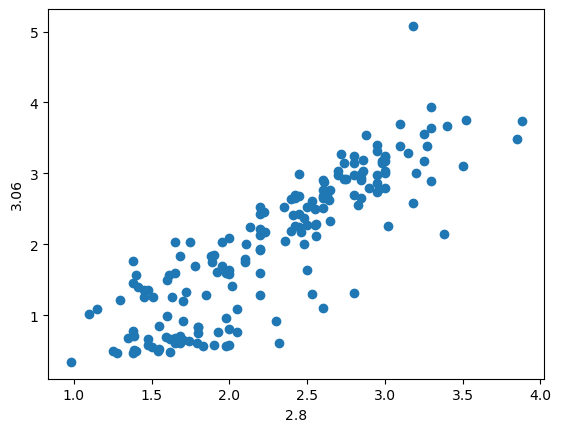

3.06 have higher correlation with target column


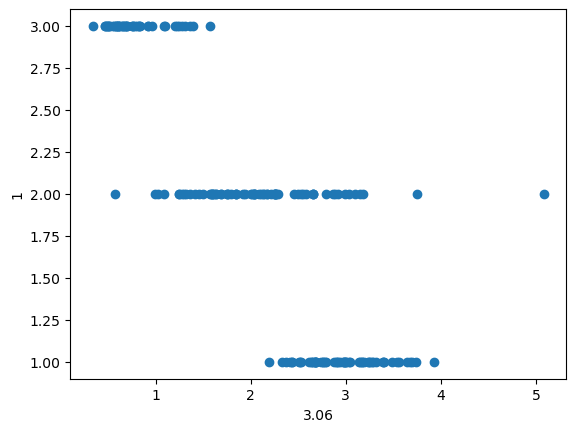

In [59]:
# Can you name two columns which show the relation mentioned in rule 3
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.
#print("2.8, 3.06")
x_dataset = data_set["2.8"]
y_dataset = data_set["3.06"]
plt.scatter(x_dataset, y_dataset)
plt.xlabel("2.8")
plt.ylabel("3.06")
plt.show()

print("3.06 have higher correlation with target column")
#print("3.06, 1")
x_data_set = data_set["3.06"]
y_data_set = data_set["1"]
plt.scatter(x_data_set, y_data_set)
plt.xlabel("3.06")
plt.ylabel("1")
plt.show()

#I don't understand question properly.



**Assignment END<br>
Please submit on teams before the deadline**